# Part 2: Segmentation

In this notebook, we will explore different classical (non-machine-learning) methods to partition an image into objects of interest.

In [1]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200

## 1. Data loading

We will work with images from the BBBC datasets considered in notebook 1 - Handling Image Data. For each dataset, we will consider examples of an "easier" segmentation problem. The "harder" samples should be left aside for now and until section 4.

**1.1** Using what you learned in notebook 1 - Handling Image Data, load the following image files:
- data/BBBC010/segmentation_easier.tif
- data/BBBC010/segmentation_harder.tif
- data/BBBC020/segmentation_easier.tif
- data/BBBC020/segmentation_harder.tif

In [2]:
# BBBC010
bbbc010_easy = imageio.imread('data/BBBC010/segmentation_easier.tif')
bbbc010_hard = imageio.imread('data/BBBC010/segmentation_harder.tif')

# BBBC020
bbbc020_easy = imageio.imread('data/BBBC020/segmentation_easier.tif')
bbbc020_hard = imageio.imread('data/BBBC020/segmentation_harder.tif')

**1.2** Using what you learned in notebook 1 - Handling Image Data, vizualize the images you will be working with.

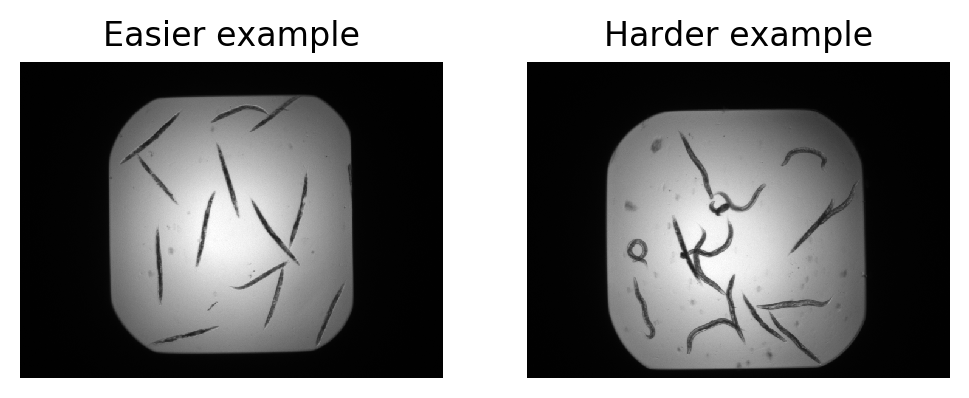

In [3]:
# BBBC010
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc010_easy, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Easier example')

axes[1].imshow(bbbc010_hard, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Harder example')

plt.show()

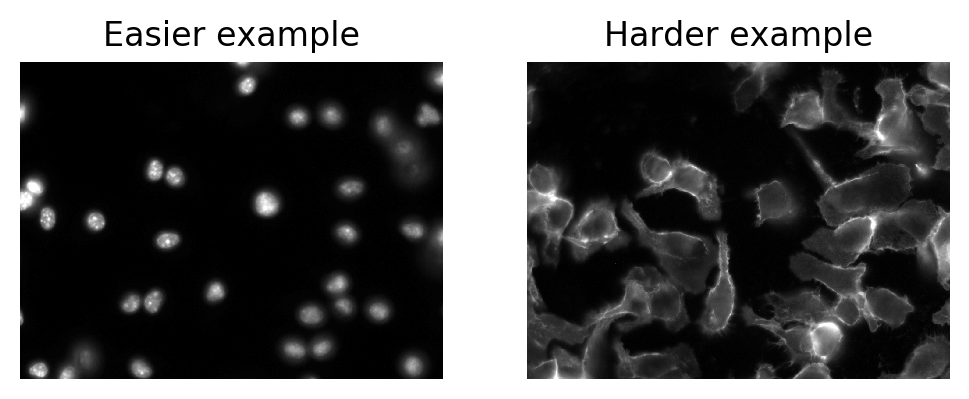

In [4]:
# BBBC020
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc020_easy, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Easier example')

axes[1].imshow(bbbc020_hard, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Harder example')

plt.show()

## 2. Thresholding

In [50]:
import skimage.filters as skf
import skimage.measure as skm
import skimage.morphology as sku

As a first step, we will attempt to group pixels into two broad "background" (containing no relevant information) and "foreground" (containing the objects of interest) categories. This is referred to as *semantic segmentation*.

**2.1** The simplest way to segment an image is to identify a cutoff value that separates pixels belonging to the background and foreground. This is referred to as *thresholding*. To help us find a threshold value, observe the  histogram of the BBBC020 image obtained by running the code below.

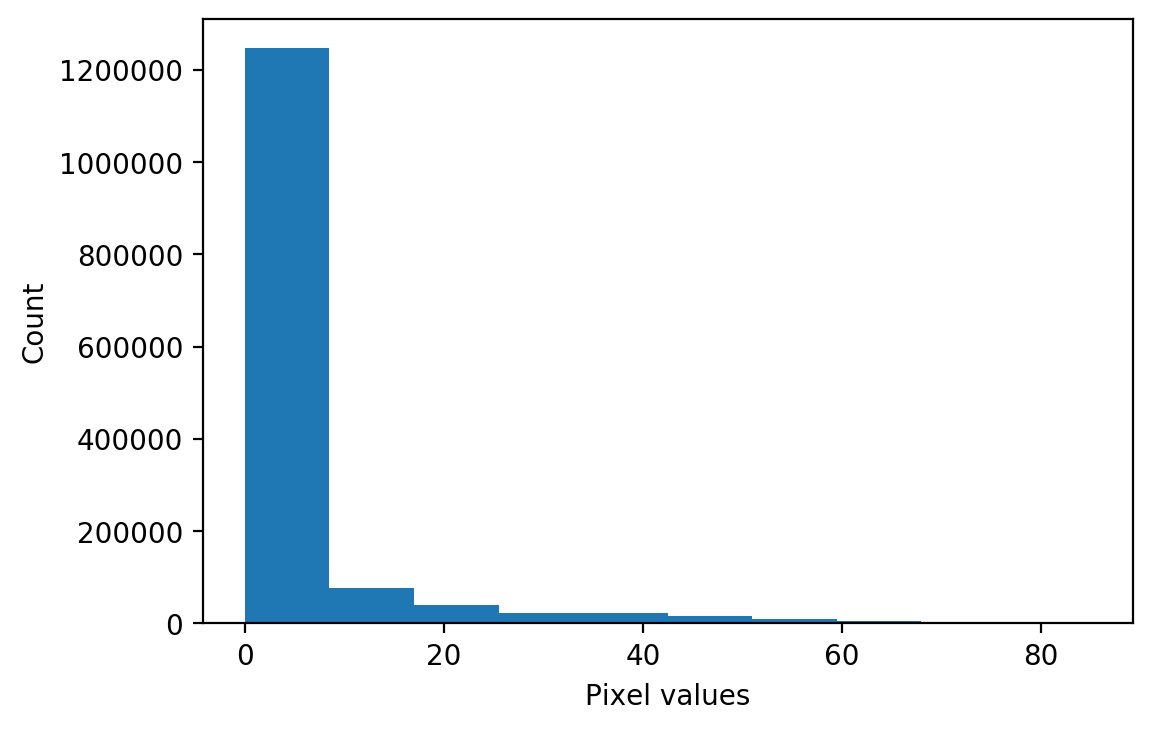

In [6]:
# Plot histogram
plt.hist(bbbc020_easy.ravel())
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.show()

**2.2** Based on the histogram, choose a threshold value. Then, complete the code below to retreive all pixels with values larger or equal than this threshold. The resulting binary image is referred to as a *mask*.

In [14]:
# Set threshold 
thresh = 30

# Retreive values larger or equal
mask_img = bbbc020_easy > thresh

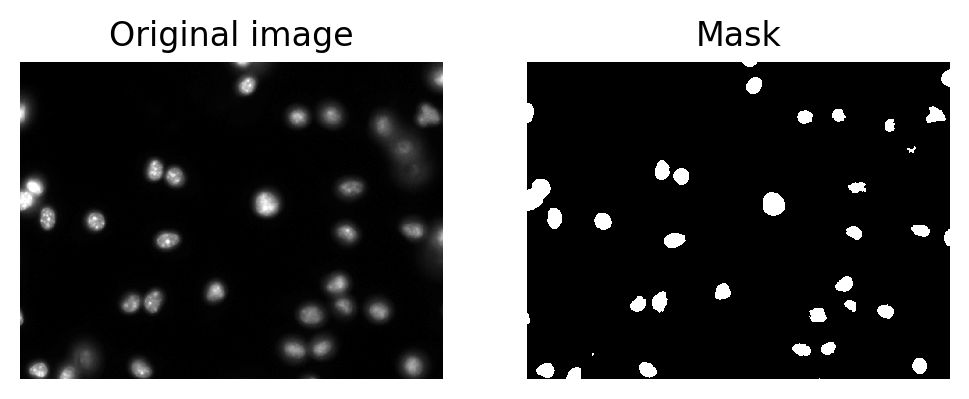

In [13]:
# Visualize the result
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc020_easy, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image')

axes[1].imshow(mask_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Mask')

plt.show()

**2.3** The process of finding a threshold value can be automated. Several methods are available to automatically retreive a threshold value, but since they are based on different criteria this value may differ. Try out a few automated thresholding algorithms such as threshold_otsu, threshold_mean, and threshold_minimum from https://scikit-image.org/docs/dev/api/skimage.filters.html. Do you see any difference? How does it compare to what you obtained by thresholding manually? 

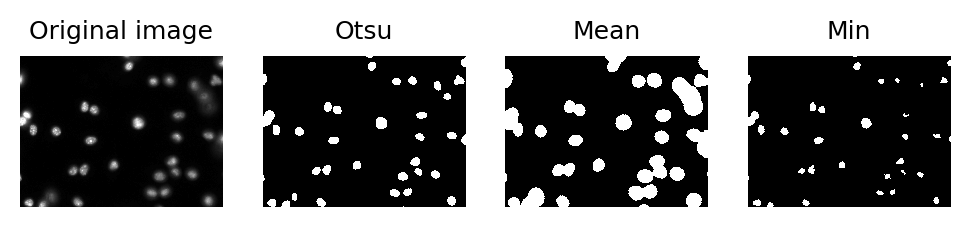

In [10]:
original_img = bbbc020_easy

# Otsu's threshold
thresh_otsu = skf.threshold_otsu(bbbc020_easy)
mask_otsu = original_img > thresh_otsu

# Mean threshold
thresh_mean = skf.threshold_mean(bbbc020_easy)
mask_mean = original_img > thresh_mean

# Minimum threshold
thresh_min = skf.threshold_minimum(bbbc020_easy)
mask_min = original_img > thresh_min

# Visualize the result
fig, axes = plt.subplots(nrows=1, ncols=4)

axes[0].imshow(original_img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image', fontsize=9)

axes[1].imshow(mask_otsu, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Otsu', fontsize=9)

axes[2].imshow(mask_mean, cmap='gray')
axes[2].axis('off')
axes[2].set_title('Mean', fontsize=9)

axes[3].imshow(mask_min, cmap='gray')
axes[3].axis('off')
axes[3].set_title('Min', fontsize=9)

plt.show()

**2.4** If you did not find it in 2.3 already, note that scikit-image provides a try_all_threshold function that does extractly what its name implies. Run it and observe the result. According to you, which method provides the best results? Why?

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


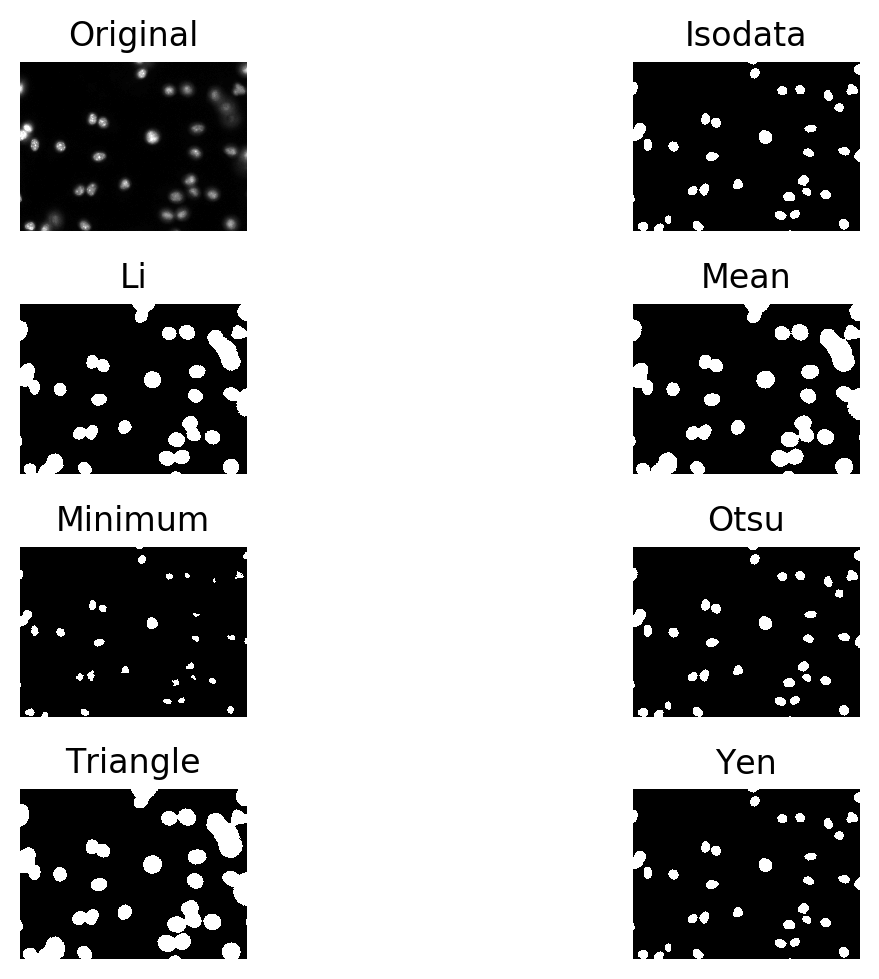

In [11]:
fig, ax = skf.try_all_threshold(bbbc020_easy)
plt.show()

Now that we've identified which parts of the image belong to foreground, we may want to separate it into individual objects. This is referred to as *instance segmentation*.

**2.5** Individual object instances can be retreived by assigning an identical value to foreground pixels that are physically connected, a method referred to as *connected component labeling* (https://en.wikipedia.org/wiki/Connected-component_labeling). Pick you favourite thresholding method and complete the code below to see the result of connected component labeling on the mask of BBBC020. 

*Bonus:* one important parameters of connected component labeling is the definition of connectivity, which can be adapted in the label function below. How does the end result differ? Do you understand why?

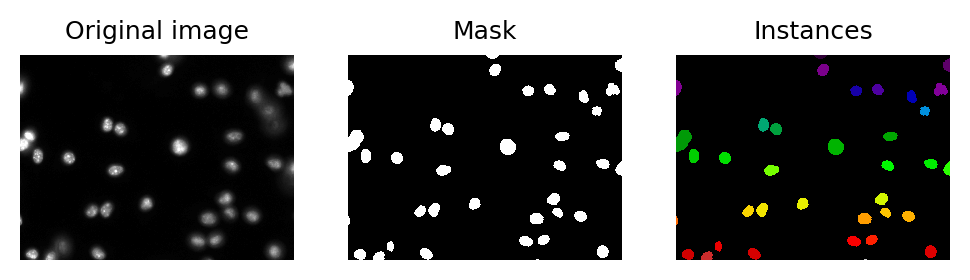

In [31]:
original_img = bbbc020_easy

# Threshold
thresh = skf.threshold_otsu(original_img)
mask_img = original_img > thresh

# Label connected components
instance_labels = skm.label(mask_img, background=0, connectivity=2)

# Visualize the result
fig, axes = plt.subplots(nrows=1, ncols=3)

axes[0].imshow(bbbc020_easy, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image', fontsize=9)

axes[1].imshow(mask_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Mask', fontsize=9)

axes[2].imshow(instance_labels, cmap='nipy_spectral')
axes[2].axis('off')
axes[2].set_title('Instances', fontsize=9)

plt.show()

**2.6** Alternatively to instance masks, individual objects can also be described by the contour of the area they occupy.  Pick you favourite thresholding method and complete the code below to see the result of an automated contour-finding algorithm (marching squares, https://en.wikipedia.org/wiki/Marching_squares) on the mask of BBBC020. Observe the result carefully: what do you notice? Where do you think this is coming from?

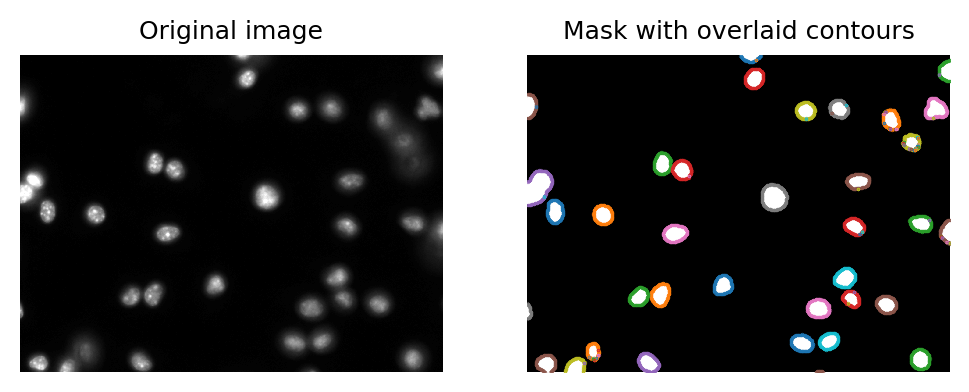

In [61]:
# Extract contours
contours = skm.find_contours(mask_img, level=0)

# Visualize the result
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(original_img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image', fontsize=9)

axes[1].imshow(mask_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Mask with overlaid contours', fontsize=9)

for c in contours:
    axes[1].scatter(c[:,1],c[:,0], s=.1, marker='.')

# Small spurious contours can be observed in many of the objects. 
# This is due to the mask being "noisy" with isolated pixels around the actual object instances.
plt.show()

**2.7** In the early days of image processing, researchers developed an extensive framework to manipulate binary masks called mathematical morphology (https://en.wikipedia.org/wiki/Mathematical_morphology). Although the theory behind mathematical morphology is out of the scope of this tutorial, a rough summary of the idea behind it is to probe a binary mask with a simple shape called *structuring element* and characterize whether this shape fits or misses the foreground objects.

The spurious contours we observed in 2.6 are due to isolated noisy pixels left by thresholding in our segmentation mask. They can be easily removed using mathematical morphology: considering a structural element that is a disk with a radius of a few pixels, we will erase all parts of the foreground that cannot fit it. As a result, the contours of each object instance will be smoothed out.

Run the code below to see how this so-called *opening* operation affects the detected contours. Try out different structural element sizes (the disk_size parameter) and observe the result. What do you see? Do you intuitively understand why?

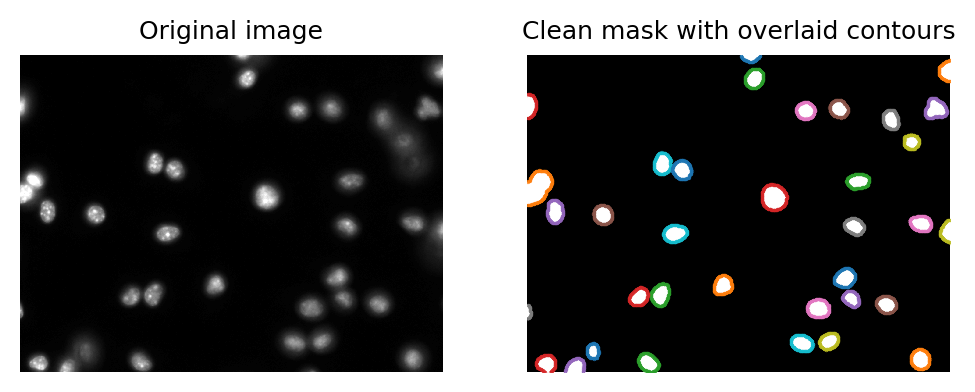

In [72]:
# Mathematical morphology
disk_size = 5
structuring_element = sku.disk(disk_size)
clean_mask = sku.binary_opening(mask_img, structuring_element)

# Extract contours
contours = skm.find_contours(clean_mask, level=0)

# Visualize the result
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(original_img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image', fontsize=9)

axes[1].imshow(clean_mask, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Clean mask with overlaid contours', fontsize=9)

for c in contours:
    axes[1].scatter(c[:,1],c[:,0], s=.1, marker='.')

# If disk_size is set to a too large value, some objects start to disappear as they get "erased".
# Try out with disk_size=30!
plt.show()

**2.8** Combining all the methods we looked at so far, try to segment the BBBC010 image. 

*Hint: remember that the image background can be subtracted by making use of Gaussian filtering, as seen in notebook 1 - Handling Image Data!*

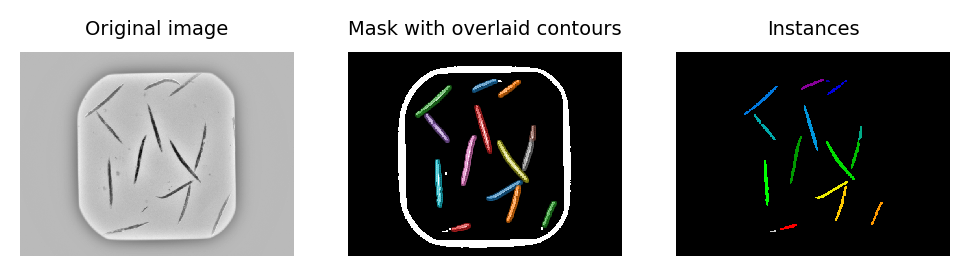

In [155]:
original_img = bbbc010_easy

# Background subtraction (see 2.4 in notebook 1)
filtered_img = skf.gaussian(original_img, sigma=20)
diff_img = (original_img/255.0) - filtered_img

# Thresholding
thresh = skf.threshold_otsu(diff_img)
# Here the objects are dark on a bright background, so the foreground is whatever is smaller than the threshold!
mask_img = diff_img < thresh 

# Mathematical morphology
disk_size = 2.5
structuring_element = sku.disk(disk_size)
clean_mask = sku.binary_opening(mask_img, structuring_element)

# Contour extraction
contours = np.array(skm.find_contours(clean_mask, level=0), dtype=object)

# Some spurious objects can be removed by setting a threshold on what is a valid size
lengths = [len(c) for c in contours]

max_size = 500
min_size = 50
valid = [i for i in range(len(lengths)) if ((lengths[i]<max_size) and (lengths[i]>min_size))]

contours = contours[valid]

# Connected component labeling
instance_labels = skm.label(clean_mask, background=0, connectivity=2)

# The label map can be cleaned up based on size, similarly to the contours above
areas = [np.sum(instance_labels== l) for l in np.unique(instance_labels)]

max_size = 5000
min_size = 50
invalid = [i for i in range(len(areas)) if ((areas[i]>max_size) or (areas[i]<min_size))]

for i in invalid:
    instance_labels[instance_labels == i] = 0

# Visualize the result
fig, axes = plt.subplots(nrows=1, ncols=3)

axes[0].imshow(diff_img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image', fontsize=7)

axes[1].imshow(clean_mask, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Mask with overlaid contours', fontsize=7)

for c in contours:
    axes[1].scatter(c[:,1],c[:,0], s=.01, marker='.')
    
axes[2].imshow(instance_labels, cmap='nipy_spectral')
axes[2].axis('off')
axes[2].set_title('Instances', fontsize=7)

plt.show()

## 3. Watershed

Some intuitive explanation of watershed (https://en.wikipedia.org/wiki/Watershed_(image_processing))

**3.1** Compute the gradient

**3.2** Run watershed

## 4. GraphCut

Some intuitive explanation of GraphCut (https://en.wikipedia.org/wiki/Graph_cuts_in_computer_vision)

**4.1**

## 5. Active contours

Some intuitive explanation of active contours

**5.1** Snakes

**5.2** Chan-Vese

## 6. So you think you can segment?

Apply everything you've seen in previous sections to try and segment the hard images. We'll see how well you can do!

**6.1** GT and semantic segmentation metrics (IoU and Dice). Best number wins

**6.2** Your turn! BBBC010

**6.3** Your turn! BBBC020